In [27]:
from qiskit_aer import AerSimulator
from qiskit import *
import qiskit_superstaq as qss
import supermarq
import numpy as np 
import os

In [28]:
ghz = supermarq.ghz.GHZ(5)
ghz_circuit = ghz.qiskit_circuit()
ghz_circuit.draw()

┌───┐          ┌─┐                      
q_0: ┤ H ├──■───────┤M├──────────────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐              
q_1: ─────┤ X ├──■───╫──────┤M├──────────────
          └───┘┌─┴─┐ ║      └╥┘     ┌─┐      
q_2: ──────────┤ X ├─╫───■───╫──────┤M├──────
               └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_3: ────────────────╫─┤ X ├─╫───■───╫─┤M├───
                     ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_4: ────────────────╫───────╫─┤ X ├─╫──╫─┤M├
                     ║       ║ └───┘ ║  ║ └╥┘
c: 5/════════════════╩═══════╩═══════╩══╩══╩═
                     0       1       2  3  4

In [29]:
emulator = Aer.get_backend('aer_simulator_density_matrix')

In [30]:
qc = transpile(ghz_circuit, emulator)
job = execute(qc, emulator, shots=8192, memory=True)
data=job.result()
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [44]:
data = job.result()
data

Result(backend_name='aer_simulator', backend_version='0.13.0', qobj_id='', job_id='d585c253-c5f0-408b-bbec-457726875fae', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3f': 479, '0x0': 521}), header=QobjExperimentHeader(creg_sizes=[['c', 6]], global_phase=0.0, memory_slots=6, n_qubits=6, name='circuit-202', qreg_sizes=[['q', 6]], metadata={}), status=DONE, seed_simulator=3972325848, metadata={'time_taken': 0.000878744, 'num_bind_params': 1, 'parallel_state_update': 24, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[5, 5], [4, 4], [3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'density_matrix', 'device': 'CPU', 'num_qubits': 6, 'sample_measure_time': 0.000126503, 'active_input_qubits': [0, 1, 2, 3, 4, 5], 'num_clbits': 6, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 63964, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applie

In [31]:
counts = job.result().get_counts()
print(counts)

{'11111': 4049, '00000': 4143}


In [32]:
score = ghz.score(counts)
print(score)

0.9999670822513446


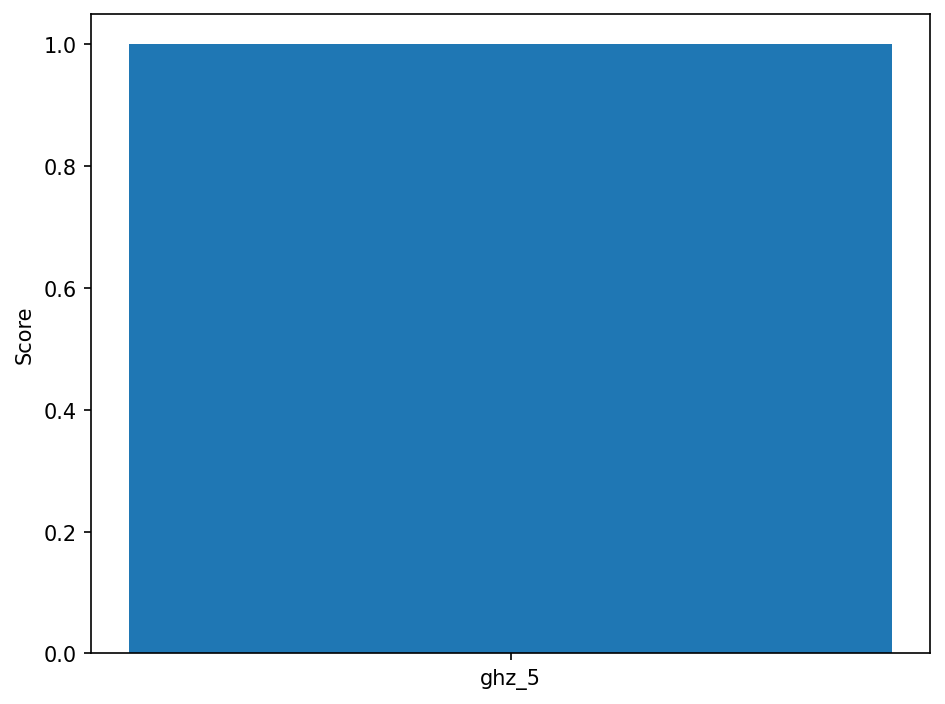

In [33]:
supermarq.plotting.plot_results([score], ["ghz_5"])

[0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0.0]
--------------------------------------------------------------


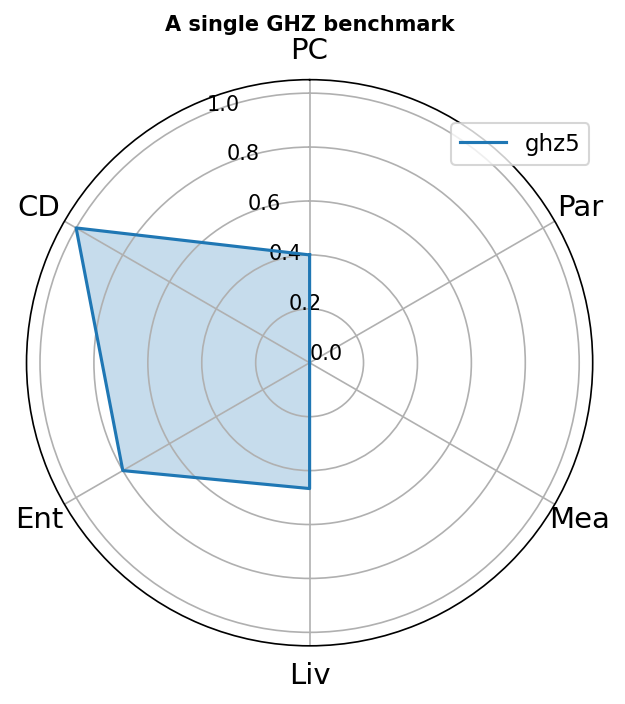

In [34]:
ghz_features = [
    supermarq.converters.compute_communication_with_qiskit(ghz_circuit),
    supermarq.converters.compute_depth_with_qiskit(ghz_circuit),
    supermarq.converters.compute_entanglement_with_qiskit(ghz_circuit),
    supermarq.converters.compute_liveness_with_qiskit(ghz_circuit),
    supermarq.converters.compute_measurement_with_qiskit(ghz_circuit),
    supermarq.converters.compute_parallelism_with_qiskit(ghz_circuit),
]
print(ghz_features)
print("--------------------------------------------------------------")
supermarq.plotting.plot_benchmark(
    ["A single GHZ benchmark", ["ghz5"], [ghz_features]],
    spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
)

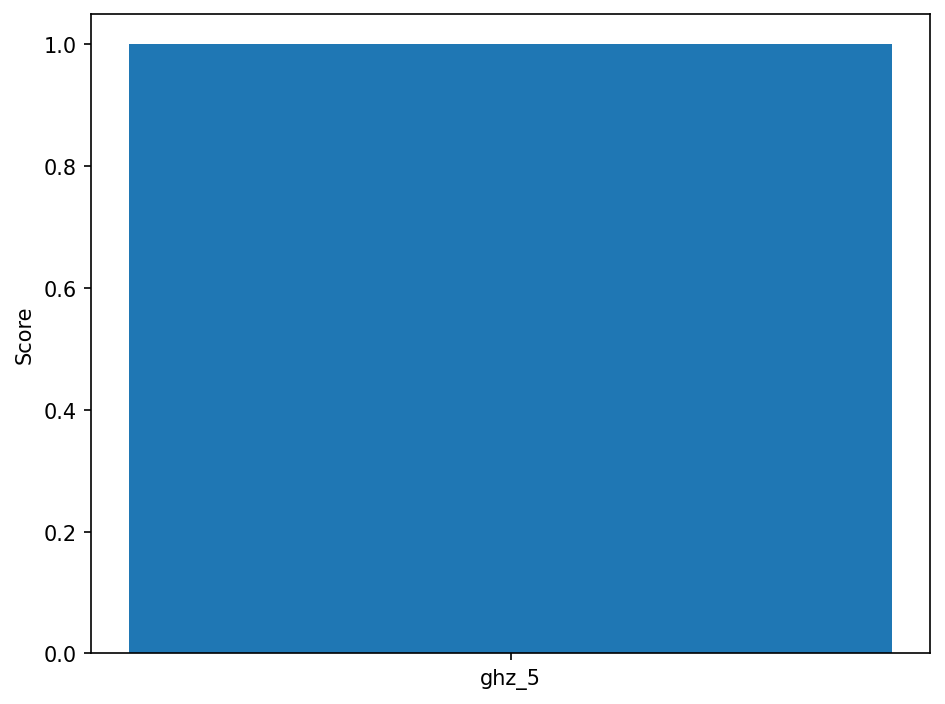

In [37]:
supermarq.plotting.plot_results([score], ["ghz_5"])

In [38]:
benchmark_features = {}
benchmarks = [(supermarq.ghz.GHZ(5), "ghz5"),(supermarq.ghz.GHZ(6), "ghz6"),]

for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'ghz5': [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0], 'ghz6': [0.3333333333333333, 1.0, 0.8333333333333334, 0.40476190476190477, 0.0, 0]}


In [41]:
jobs = []
for benchmark, label in benchmarks:
    job = emulator.run(benchmark.qiskit_circuit(), shots=1000)
    jobs.append((label, job, benchmark))
jobs

[('ghz5',
  <supermarq.benchmarks.ghz.GHZ at 0x76ed7dc5cd90>),
 ('ghz6',
  <supermarq.benchmarks.ghz.GHZ at 0x76ed7dc5e800>)]

In [45]:
device_scores = {}
for label, job, benchmark in jobs:
    if job.status() == qiskit.providers.jobstatus.JobStatus.DONE:
        counts = job.result(0).get_counts()
        print(counts)
        score = benchmark.score(counts)
        print(score)
        device_scores[label] = score
    else:
        print(label, "not done!")

{'11111': 535, '00000': 465}
0.9987734956871706
{'111111': 479, '000000': 521}
0.9995588053472785


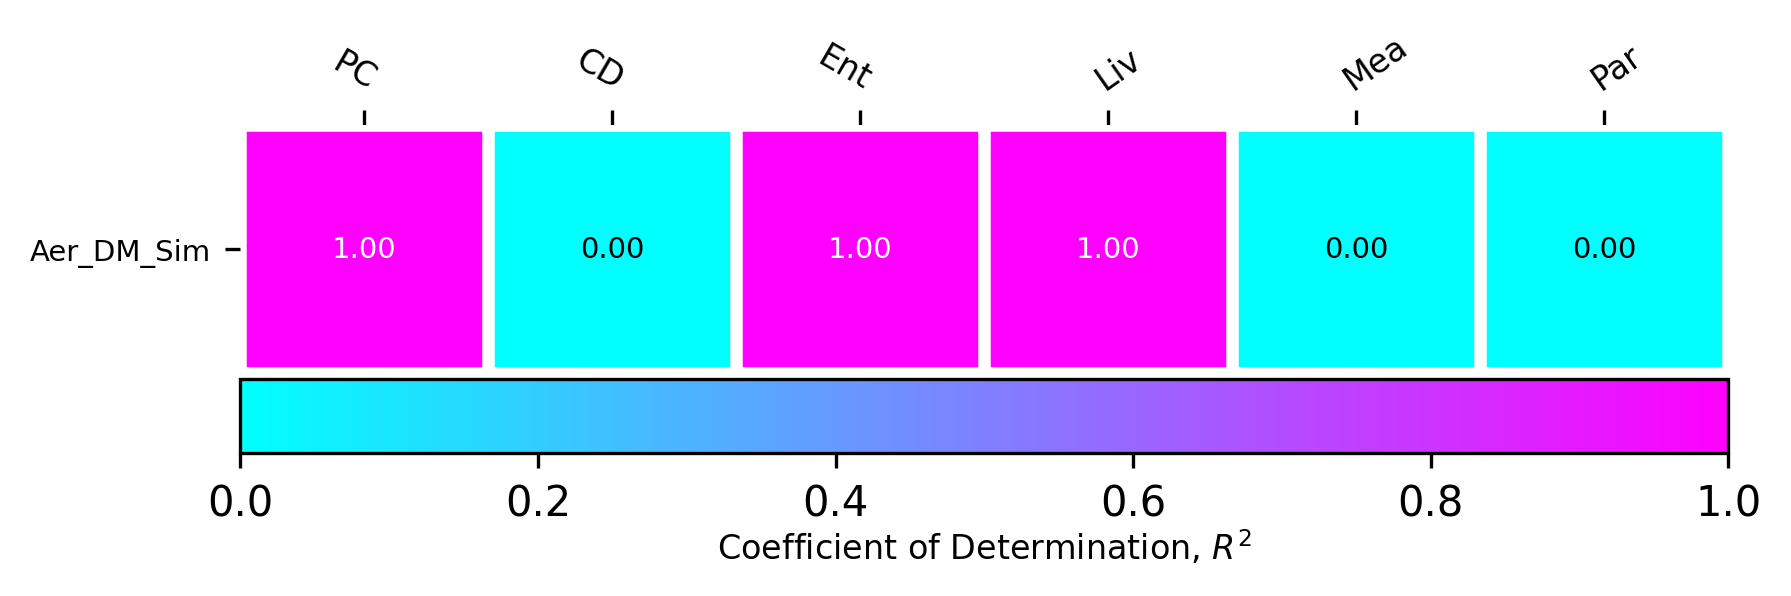

In [48]:
supermarq.plotting.plot_correlations(benchmark_features,
    device_scores,
    ["PC", "CD", "Ent", "Liv", "Mea", "Par"],
    device_name="Aer_DM_Sim",)